# **Modeling**

In [103]:
import pandas as pd

train = pd.read_csv('data/train_processed.csv')
test = pd.read_csv('data/test_processed.csv')

We encode the qualitative variables to have numbers for the differents classes

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

qualitative_columns = train.select_dtypes(include=['object']).columns
for features in qualitative_columns:
    train[features] = le.fit_transform(train[features].astype(str))
    test[features] = le.fit_transform(test[features].astype(str))

We divide the train set into a smaller train set and a validation set

In [105]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['SalePrice'])  
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

-----------

# Model optimization

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

## **Regression tree tuning**
Uncomment to run

In [107]:
"""
# We create a Decision Tree Regressor
reg_tree = DecisionTreeRegressor(random_state=42)

# Hyperparameters Grid
param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 100, 'sqrt', 'log2']
}

# Grid Search (we use negative mean squared error as score since gridsearch want to maximize it)
grid_tree = GridSearchCV(estimator=reg_tree, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_tree.fit(X_train, y_train)

# Best parameters and best model
print("Best parameters for Regression Tree:", grid_tree.best_params_)
best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_val)

#
print("Regression Tree RMSE:", root_mean_squared_error(y_val, y_pred_tree))"""


'\n# We create a Decision Tree Regressor\nreg_tree = DecisionTreeRegressor(random_state=42)\n\n# Hyperparameters Grid\nparam_grid_tree = {\n    \'max_depth\': [3, 5, 10],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [1, 100, \'sqrt\', \'log2\']\n}\n\n# Grid Search (we use negative mean squared error as score since gridsearch want to maximize it)\ngrid_tree = GridSearchCV(estimator=reg_tree, param_grid=param_grid_tree, cv=5, scoring=\'neg_mean_squared_error\', verbose=1)\ngrid_tree.fit(X_train, y_train)\n\n# Best parameters and best model\nprint("Best parameters for Regression Tree:", grid_tree.best_params_)\nbest_tree = grid_tree.best_estimator_\ny_pred_tree = best_tree.predict(X_val)\n\n#\nprint("Regression Tree RMSE:", root_mean_squared_error(y_val, y_pred_tree))'

### **Regression Tree Results**
The hyperparameter tuning for the Regression Tree was conducted using GridSearchCV with 81 combinations of hyperparameters. Each combination was evaluated using 5-fold cross-validation.

### Best Parameters
The best hyperparameters for the Regression Tree model were:
- `max_depth`: 5
- `max_features`: 100
- `min_samples_leaf`: 4
- `min_samples_split`: 2

### Performance
- **RMSE** (Root Mean Squared Error) on the validation set: **37,687.26**


----------------------

## **XGBoost Regressor tuning**
Uncomment to run (**Warning**: Took 10 hours for us !)

In [108]:
"""# We create a XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Hyperparameters Grid
param_grid_xgb = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

# Grid Search
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_xgb.fit(X_train, y_train)

# Best parameters and best model
print("Best parameters for XGBoost:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_val)

# RMSE
print("XGBoost RMSE:", root_mean_squared_error(y_val, y_pred_xgb))"""

'# We create a XGBoost Regressor\nxgb_model = XGBRegressor(random_state=42)\n\n# Hyperparameters Grid\nparam_grid_xgb = {\n    \'max_depth\': [3, 5, 10],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [100, 200, 500],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'gamma\': [0, 1, 5],\n    \'reg_alpha\': [0, 0.1, 1],\n    \'reg_lambda\': [1, 5, 10]\n}\n\n# Grid Search\ngrid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring=\'neg_mean_squared_error\', verbose=1)\ngrid_xgb.fit(X_train, y_train)\n\n# Best parameters and best model\nprint("Best parameters for XGBoost:", grid_xgb.best_params_)\nbest_xgb = grid_xgb.best_estimator_\ny_pred_xgb = best_xgb.predict(X_val)\n\n# RMSE\nprint("XGBoost RMSE:", root_mean_squared_error(y_val, y_pred_xgb))'

### **XGBoost Results**

### Best Parameters
The best hyperparameters for the XGBoost model were:
- `colsample_bytree`: 0.6
- `gamma`: 0
- `learning_rate`: 0.1
- `max_depth`: 3
- `n_estimators`: 500
- `reg_alpha`: 0
- `reg_lambda`: 10
- `subsample`: 1.0

### Performance
- **RMSE** (Root Mean Squared Error) on the validation set: **27,832.37**

-----------------

# Model implementation
We implement the two optimize models

In [109]:
# Optimize Tree
Tree = DecisionTreeRegressor(max_depth=5, max_features=100, min_samples_leaf=4, 
                             min_samples_split=2, random_state=42)

# Optimize XGBoost
XGBoost = XGBRegressor(colsample_bytree=0.6, gamma=0, learning_rate=0.1, 
                       max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, 
                       subsample=1.0, random_state=42)

# Fit the models
Tree.fit(X_train, y_train)
XGBoost.fit(X_train, y_train)

# Predictions
y_pred_tree = Tree.predict(X_val)
y_pred_xgb = XGBoost.predict(X_val)

# RMSE

print("Regression Tree RMSE:", round(root_mean_squared_error(y_val, y_pred_tree), 2))
print("XGBoost RMSE:", round(root_mean_squared_error(y_val, y_pred_xgb), 2))

Regression Tree RMSE: 37687.26
XGBoost RMSE: 27832.37


Dataframe to compare the real sale price and the predicted price of the two models on the validtion set.

In [117]:
import numpy as np

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'SalePrice': y_val,
    'Pred_Tree': np.round(y_pred_tree).astype(int),
    'Pred_XGB': np.round(y_pred_xgb).astype(int),
    'Error_Tree': np.round(np.abs(y_val - y_pred_tree).astype(int)),
    'Error_XGB': np.round(np.abs(y_val - y_pred_xgb).astype(int))
})

# Display the first few rows of the DataFrame
results_df.head(20)

,SalePrice,Pred_Tree,Pred_XGB,Error_Tree,Error_XGB
892,154500,122421,140024,32078,14476
1105,325000,352098,332971,27097,7970
413,115000,135069,108053,20068,6946
522,159000,210657,164650,51656,5650
1036,315500,278374,329861,37125,14360
614,75500,86411,74212,10910,1288
218,311500,191189,220641,120311,90859
1160,146000,174099,137967,28099,8033
649,84500,86411,76908,1910,7592
887,135500,122421,136148,13078,648


Boxplot of the error of predictions of the two models

/var/folders/4q/wlkm41x57nv0n4qhnyv84kjc0000gn/T/ipykernel_59486/4219730222.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['Error_Tree', 'Error_XGB'], showmeans=True, widths=0.8)


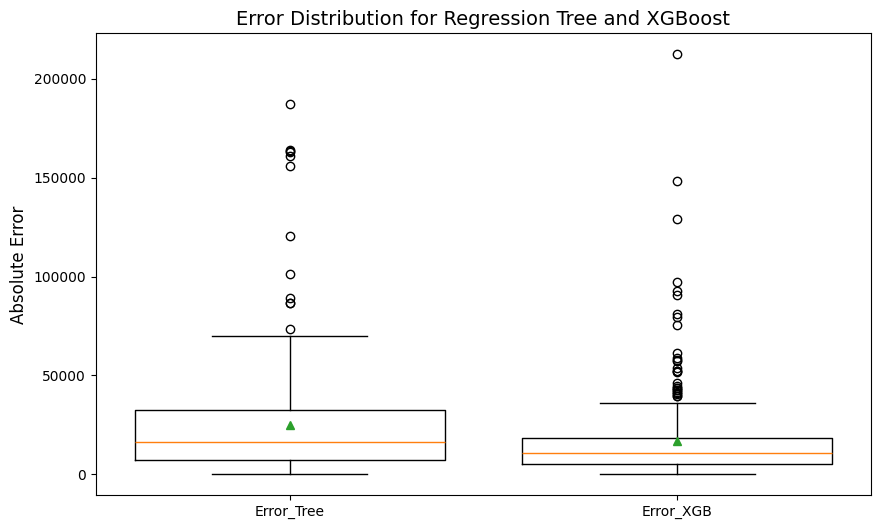

In [121]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Data for box plots
data = [results_df['Error_Tree'], results_df['Error_XGB']]

# Create box plots
ax.boxplot(data, labels=['Error_Tree', 'Error_XGB'], showmeans=True, widths=0.8)

# Add title and labels
ax.set_title('Error Distribution for Regression Tree and XGBoost', fontsize=14)
ax.set_ylabel('Absolute Error', fontsize=12)

# Show the plot
plt.show()

------------

## Prediction on the test set

In [ ]:
y_test_tree = Tree.predict(test)
y_test_xgb = XGBoost.predict(test)

# Create a DataFrame with the test predictions
res

In [115]:
test['SalePrice_Tree']

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,FireplaceQu_Score,FireplaceFeature,GarageCapacityScore,TotalSize,BasementUtilityScore
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,6,2010,8,4,0,0,730.0,1778.0,0.0
1,20,3,81.0,14267,1,0,3,0,0,0,...,12500,6,2010,8,4,0,0,312.0,2658.0,0.0
2,60,3,74.0,13830,1,0,3,0,4,0,...,0,3,2010,8,4,3,3,964.0,2557.0,0.0
3,60,3,78.0,9978,1,0,3,0,4,0,...,0,6,2010,8,4,4,4,940.0,2530.0,0.0
4,120,3,43.0,5005,1,0,1,0,4,0,...,0,1,2010,8,4,0,0,1012.0,2560.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,3,3,0,4,0,...,0,6,2006,8,4,0,0,0.0,1638.0,0.0
1455,160,4,21.0,1894,1,3,3,0,4,0,...,0,4,2006,8,0,0,0,286.0,1638.0,0.0
1456,20,3,160.0,20000,1,3,3,0,4,0,...,0,9,2006,8,0,3,3,1152.0,2448.0,1224.0
1457,85,3,62.0,10441,1,3,3,0,4,0,...,700,7,2006,8,4,0,0,0.0,1882.0,0.0
